This data is from https://researchbox.org/336.

Uri Simonsohn; Joe Simmons; Leif Nelson, 'Evidence of Fraud in an Influential Field Experiment About Dishonesty', Data Colada
https://datacolada.org/98

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
df = pd.read_csv("drivingdata.csv")

In [71]:
df.head(2)

,condition,id,baseline_car1,update_car1
0,Sign Top,1,896,39198
1,Sign Bottom,2,21396,63511


In [72]:
df['implied_mileage'] = df.update_car1 - df.baseline_car1
df['baseline_last_digit'] = df.baseline_car1.astype(str).str[-1].astype(int)
df['update_last_digit'] = df.update_car1.astype(str).str[-1].astype(int)

In [73]:
hist_sty = {'bins': 10,
            'ec': 'black',
           'density': True}

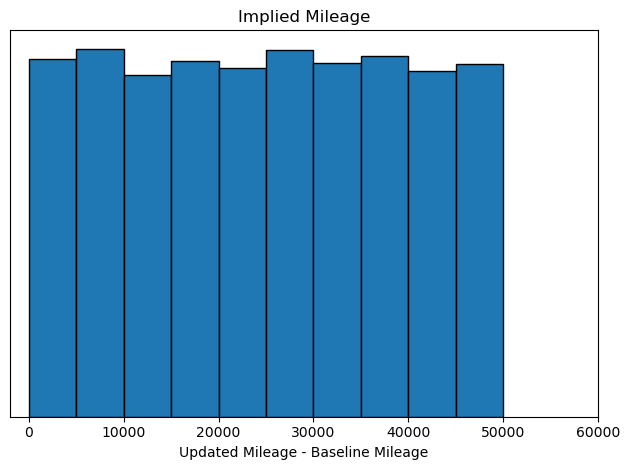

In [92]:
# Miles Driven

fig, ax = plt.subplots()
ax.hist(df.implied_mileage, **hist_sty)

ax.set_yticks([])
ax.set_title("Implied Mileage")
ax.set_xlabel("Updated Mileage - Baseline Mileage")
ax.set_xlim(-2000,60_000)
plt.tight_layout()
plt.savefig("../../book/images/colada98_implied_hist.svg", format = 'svg', transparent = True)
plt.show()

# Baseline

In [75]:
df.baseline_car1.describe()

count     13488.000000
mean      67356.428381
std       56761.319730
min           0.000000
25%       25274.000000
50%       56341.500000
75%       96259.250000
max      983155.000000
Name: baseline_car1, dtype: float64

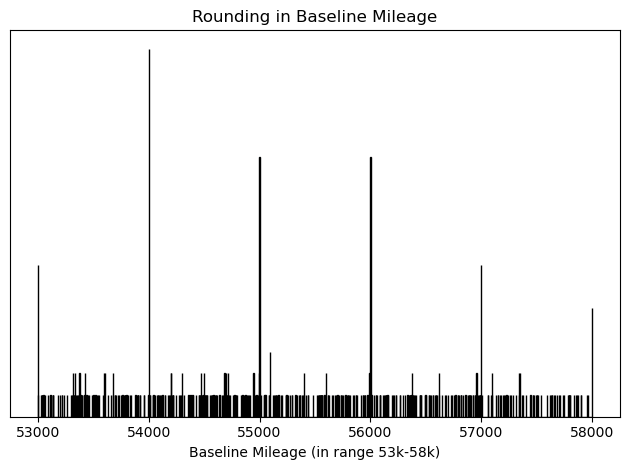

In [82]:
# Miles Driven
data = df.baseline_car1

low = 53_000 - 1
high = 58_001
data = data[(data > low) & (data < high)]

fig, ax = plt.subplots()
ax.hist(data, 
        bins = high - low,
        density = True,
        ec = 'black')

ax.set_yticks([])
ax.set_xticks(range(low+1, high, 1000))
ax.set_title("Rounding in Baseline Mileage")
ax.set_xlabel("Baseline Mileage (in range 53k-58k)")


plt.tight_layout()
plt.savefig("../../book/images/colada98_baseline_hist.svg", format = 'svg', transparent = True)
plt.show()

In [77]:
data.value_counts(normalize = False)

baseline_car1
54000    17
55000    12
56000    12
53000     7
57000     7
         ..
54145     1
54598     1
53900     1
55554     1
57895     1
Name: count, Length: 463, dtype: int64

# Updated

In [52]:
df.update_car1.describe().astype(int)

count      13488
mean       92285
std        58577
min           42
25%        50088
50%        82382
75%       123313
max      1010893
Name: update_car1, dtype: int64

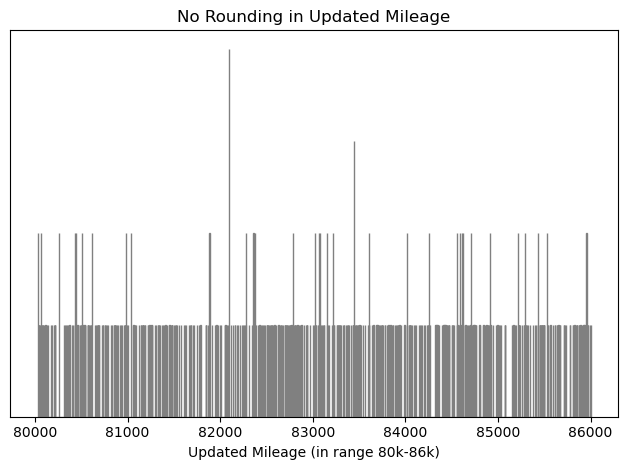

In [85]:
# Miles Driven
data = df.update_car1

low = 80_000 - 1
high = 86_001
data = data[(data > low) & (data < high)]


c = (.2, 0, 0)

fig, ax = plt.subplots()
ax.hist(data, 
        fc = 'gray',
        bins = high - low,
        density = False,
        ec = 'gray')

ax.set_yticks([])
ax.set_xticks(range(low+1, high, 1000))
ax.set_title("No Rounding in Updated Mileage")
ax.set_xlabel("Updated Mileage (in range 80k-86k)")


plt.tight_layout()
plt.savefig("../../book/images/colada98_update_hist.svg", format = 'svg', transparent = True)
plt.show()

In [57]:
data.value_counts()

update_car1
82090    4
83441    3
82376    2
82359    2
85427    2
        ..
82812    1
83999    1
82715    1
82213    1
85452    1
Name: count, Length: 575, dtype: int64

# Last Digit

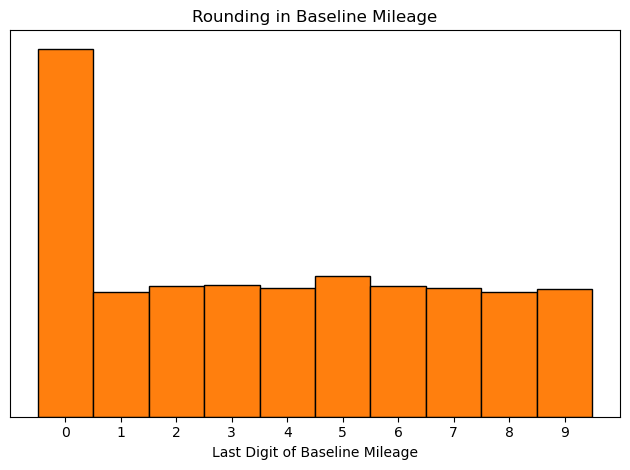

In [61]:
bins = np.linspace(-0.5, 9.5, 11)

fig, ax = plt.subplots()
ax.hist(df.baseline_last_digit, 
        color = 'C1',
        bins = bins,
       ec = 'black')

ax.set_yticks([])
ax.set_xticks(range(0,10))
ax.set_title("Rounding in Baseline Mileage")
ax.set_xlabel("Last Digit of Baseline Mileage")

plt.tight_layout()
plt.savefig("../../book/images/colada98_base_last_digit.svg", format = 'svg', transparent = True)
plt.show()

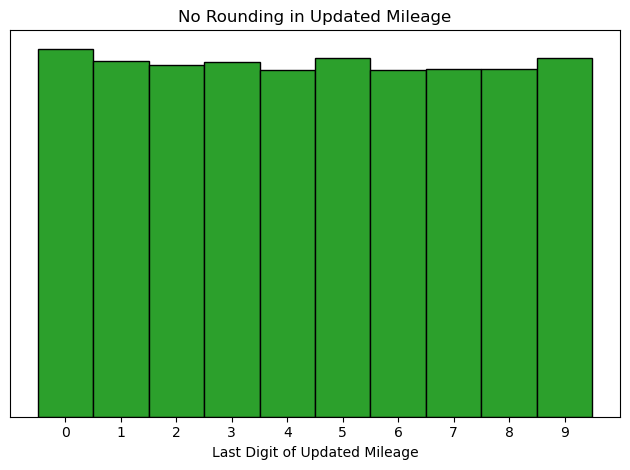

In [62]:
# Miles Driven

bins = np.linspace(-0.5, 9.5, 11)

fig, ax = plt.subplots()
ax.hist(df.update_last_digit, 
        color = 'C2',
        bins = bins,
       ec = 'black')

ax.set_yticks([])
ax.set_xticks(range(0,10))
ax.set_title("No Rounding in Updated Mileage")
ax.set_xlabel("Last Digit of Updated Mileage")

plt.tight_layout()
plt.savefig("../../book/images/colada98_update_last_digit.svg", format = 'svg', transparent = True)
plt.show()